<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/2022notebooks/2022_1024ntt_psylex2pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NTT 日本語の語彙特性の扱い

- date: 2022_1028
- author: 浅川伸一
- filename: 2022_1024ntt_psylex1_8_handling.ipynb

これを使って，LAM の改訂版を作る予定

# 日本語の語彙特性，第1巻，頁: 凡例 xlvii より

* 単語親密度データベースの各エントリーは次の10フィールドからなる。

|フィールド番号|フィールド名|形式|文字種|
|:---|:---|:---|:---| 
|1 | ID番号         |固定長 6 桁整数| 半角数字 |
|2 |読み（カタカナ）  |可変長文字列   | 全角文字 |
|3 |表記            |可変長文字列   | 全角文字 |
|4 |長さ（モーラ数）  |可変長整数     | 半角数字 |
|5 |アクセント型     |可変長文字列   | 半角文字 |
|6 |文字音声単語親密度|固定長実数（小数点以下 3 桁）| 半角数字 |
|7 |音声単語親密度   |固定長実数（小数点以下 3 桁）| 半角数字 |
|8 |文字単語親密度   |固定長実数（小数点以下 3 桁）|  半角数字 |
|9＊|被験者数        |可変長整数               | 半角数字 |
|10＊|読み（複合アクセント区切り記号付きカタカナ） | 可変長文字列 全角文字と“＋” |

* 注1） CD-ROM 上のファイル名は `psylex.txt`。
ファイル内のフィールド区切りは半角スペース。
ファイル内の行の順番は紙面とは一致しない。
* 注2）*は CD-ROM上のファイルのみに存在するフィールド。

* 第 1 フィールド：ID番号
各単語に付与した固有の番号。
この番号は NTTデータベースシリーズ『日本語の語彙特性』の第 5 巻を除く第 1 巻から第 6 巻に収録した単語に共通である。
この ID 番号は『新明解国語辞典第四版』（金田一，柴田，山田，山田，1989）の見出し語順とは異なる。
* 第 2 フィールド：読み（カタカナ）
カタカナで表わした単語の読み。
通常のカタカナ表記法に則った形式。
したがって，第 3フィールドの表記が全てカタカナ表記である場合，第 2フィールドと第 3フィールドは等しい。
* 第 3フィールド：表記
第 2 巻の単語表記データベースから，ある基準で抽出した現代語として適当とみなせる表記。
* 第 4フィールド：長さ（モーラ数）
モーラ数で表わした単語の長さ。
* 第 5フィールド：アクセント型
第 3 巻の単語アクセントデータベースから，ある基準で抽出した現代語として適当とみなせるアクセント型。
アクセント型の表示は，『新明解国語辞典第四版』（金田一，柴田，山田，山田，1989）の付表 1「アクセント型の一覧」（p．1423）に従った。
ただし，付表 1 の中の「拍数」は「モーラ数」と読み換える必要がある。
この第 5 フィールドにおいては，3 モーラ 3 型や 4 モーラ 4 型のように語尾にアクセント核がある nモーラ n型の アクセントも便宜的に 0 型 として表示した。
ただし 1 モーラ長の単語は例外的に 0 型と 1 型を区別して表示した。
語尾にアクセント核がある場合と 0 型のアクセント型を区別する必要があるときは，第 3 巻の単語アクセントデータベースを参照のこと。
* 第 6 フィールド：文字音声単語親密度 
7 段階尺度（ 1：なじみがない 7：なじみがある）で評定した文字音声単語の親密度の平均値。
値は 1.000 から 7.000 の実数。
欠損値は “z” で表わした。
* 第 7 フィールド：音声単語親密度 
7 段階尺度（ 1：なじみがない 7：なじみがある）で評定した音声単語の親密度の平均値。値は 1.000 から 7.000 の実数。
欠損値は “z” で表わした。
* 第 8 フィールド：文字単語親密度
７ 段階尺度（ 1：なじみがない 7：なじみがある）で評定した文字単語の親密度の平均値。
値は 1.000 から 7.000 の実数。
欠損値は “z” で表わした。
* 第 9 フィールド：被験者数
単語親密度を評定した被験者の数。
* 第10フィールド：読み（複合アクセント区切り記号付きカタカナ）
第 2 フィールドで示したカタカナで表わした単語の読みに，複合アクセント区切り記号として“＋”を挿入して区切った単語の読み。

## 注意事項

単語親密度データベースに収録したエントリーは，『新明解国語辞典第四版』（金田一，柴田，山田，山田，1989）の見出し語を基本としたが，それと同一ではない。
また，意味および品詞による単語の区別は基本的にしていない。
他のデータベースに存在するエントリーであっても，それが単語親密度データベースに存在するとは限らない。これらの点については解説を参照のこと。



In [ ]:
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
import unicodedata
import pandas as pd
import matplotlib.pyplot as plt

try:
    import jaconv
except ImportError:
    !pip install jaconv
    import jaconv
    
try:
    import japanize_matplotlib
except ImportError:
    !pip install japanize_matplotlib
    import japanize_matplotlib

from IPython import get_ipython
isColab =  'google.colab' in str(get_ipython())

In [3]:
if isColab:
    from google.colab import files
    uploaded = files.upload()  # psylex1.txt をアップロード    

Saving psylex1.txt to psylex1.txt


In [5]:
fname = 'psylex1.txt'  
with open(fname, 'r', encoding='utf-8') as fp:
    A = fp.readlines()

psylex1_dict = {}
for line in A:
    _line = unicodedata.normalize('NFKC', line).strip().split(' ')
    _line[0] = _line[0].replace('\ufeff','')
    
    for x in [5, 6, 7]:
        if _line[x] == 'z':
            _line[x] = np.nan
        else:
            _line[x] = float(_line[x])
    

    psylex1_dict[_line[0]] = {'読み':         _line[1],
                              '表記':         _line[2],
                              'モーラ数':      _line[3],
                              'アクセント型':   _line[4],
                              '文字音声親密度': _line[5],
                              '音声単語親密度': _line[6],
                              '文字単語親密度': _line[7],
                             }

psylex1 = pd.DataFrame.from_dict(psylex1_dict, orient='index')    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a6c170c90>,
      dtype=object)

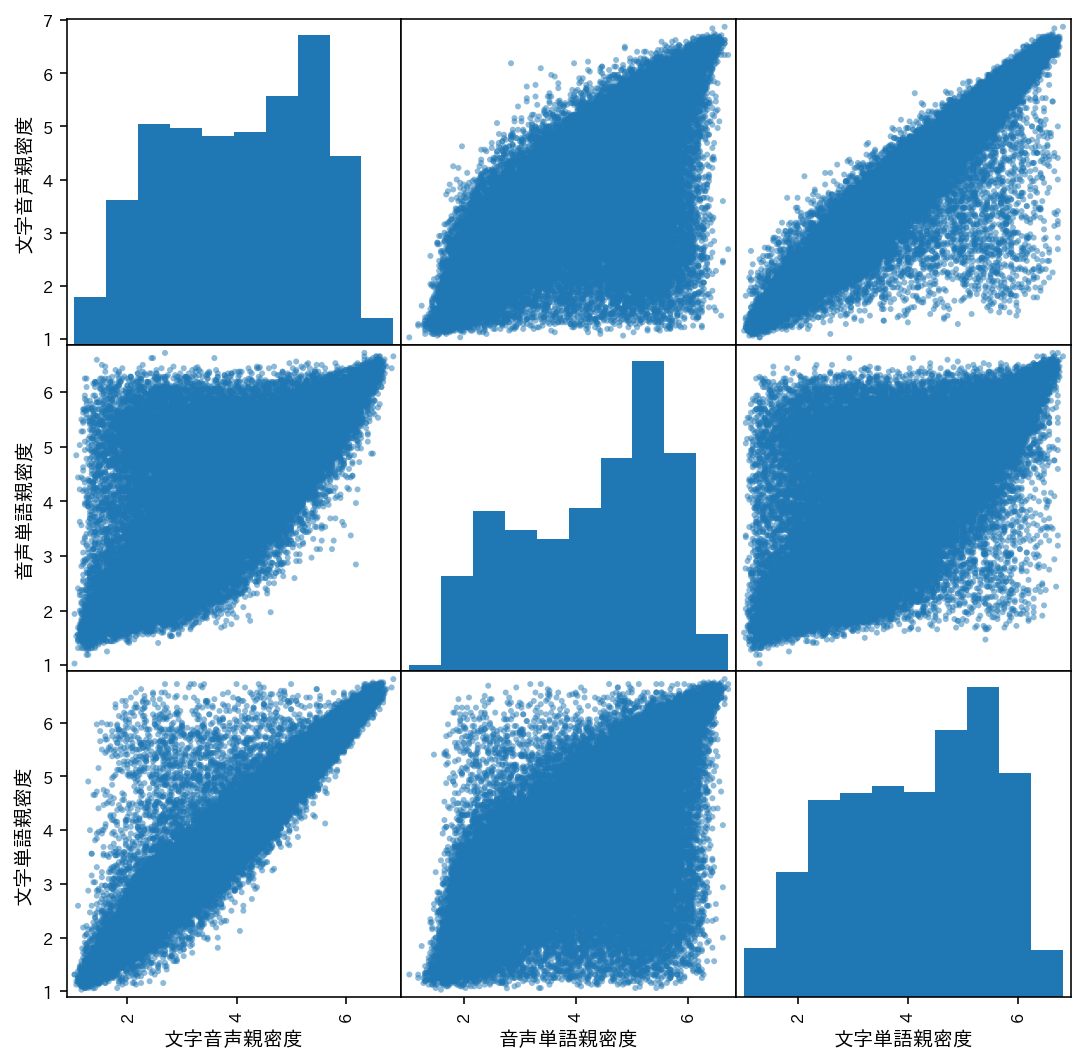

In [6]:
pd.plotting.scatter_matrix(psylex1, figsize=(9,9))

In [ ]:
psylex1.corr()

,文字音声親密度,音声単語親密度,文字単語親密度
文字音声親密度,1.000000,0.761799,0.947476
音声単語親密度,0.761799,1.000000,0.714801
文字単語親密度,0.947476,0.714801,1.000000


In [ ]:
psylex1.describe()

,文字音声親密度,音声単語親密度,文字単語親密度
count,69007.000000,69009.000000,69009.000000
mean,4.059673,4.286231,4.137215
std,1.356152,1.292645,1.355932
min,1.029000,1.029000,1.031000
25%,2.906000,3.156000,3.000000
50%,4.156000,4.594000,4.281000
75%,5.250000,5.375000,5.312000
max,6.875000,6.719000,6.812000


In [ ]:
if isColab:
    from google.colab import files
    uploaded = files.upload()  # psylex8.txt をアップロード    

In [ ]:
fname = 'psylex8.txt'  
with open(fname, 'r', encoding='utf-8') as fp:
    A = fp.readlines()

psylex8_dict = {}
for line in A:
    _line = unicodedata.normalize('NFKC', line).strip().split(' ')
    _line[0] = _line[0].replace('\ufeff','')
    
    for x in [7, 9, 16, 21]:
        if _line[x] == 'z':
            _line[x] = np.nan
        else:
            _line[x] = float(_line[x])
    
        psylex8_dict[_line[0]] = {
            '共通ID番号':       _line[1],
            '共通ID注釈':       _line[2],
            '読み':            _line[3],
            '表記':            _line[4],
            'アクセント型':     _line[5],
            '文字単語評定人数':  _line[6],
            '文字単語心像性':    _line[7],
            '音声単語評定人数':  _line[8],
            '音声単語心像性':    _line[9],
            '選択肢の有無':      _line[10],
            '文字単語と音声単語の第1意味異同の注釈': _line[11],
            '文字ID番号':        _line[12],
            '文字刺激の表記':    _line[13],
            '文字単語第1意味':  _line[14],
            '文字単語第1意味の選択人数': _line[15],
            '文字単語第1意味の心像性': _line[16],
            '音声ID番号':       _line[17],
            '音声刺激のカタカナ表記': _line[18],
            '音声単語第1意味': _line[19],
            '音声単語第1意味の選択人数': _line[20],
            '音声単語第1意味の心像性': _line[21],
            '音声ファイル名': _line[22]
                              }
        

psylex8 = pd.DataFrame.from_dict(psylex8_dict, orient='index')    
psylex8

,共通ID番号,共通ID注釈,読み,表記,アクセント型,文字単語評定人数,文字単語心像性,音声単語評定人数,音声単語心像性,選択肢の有無,...,文字刺激の表記,文字単語第1意味,文字単語第1意味の選択人数,文字単語第1意味の心像性,音声ID番号,音声刺激のカタカナ表記,音声単語第1意味,音声単語第1意味の選択人数,音声単語第1意味の心像性,音声ファイル名
00001,000020,1,アア,ああ,1,35,3.971,31,3.710,A,...,ああ,z,z,NaN,00001A1,アア,ああ(肯定・承認:例、ああ、そうでしたか),25,3.440,\001\ba000280_026
00002,000040,1,アア,ああ,0,z,NaN,29,3.172,z,...,z,z,z,NaN,00002A0,アア,z,27,3.074,\001\bb000290_433
00003,z,z,アーカンソー,アーカンソー,z,31,3.194,z,NaN,z,...,アーカンソー,z,z,NaN,z,z,z,z,NaN,z
00004,000060,1,アーケード,アーケード,1,35,4.886,31,5.065,z,...,アーケード,z,z,NaN,00003A0,アーケード,z,z,NaN,\001\ea000030_0b3
00005,000060,1,アーケード,アーケード,3,35,4.886,31,4.742,z,...,アーケード,z,z,NaN,00004A0,アーケード,z,z,NaN,\001\ec000040_1ac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54216,597470,1,ワンポイント,ワンポイント,3,35,4.257,31,4.194,z,...,ワンポイント,z,z,NaN,39443A0,ワンポイント,z,30,4.200,\062\fc703960_488
54217,597480,1,ワンマン,ワンマン,1,35,4.571,30,4.033,VA,...,ワンマン,運転手のみの意(例、ワンマンバス),20,4.500,39444A1,ワンマン,ワンマン(自分の考えだけで決める独裁者),15,3.867,\062\da703970_508
54218,597510,1,ワンリョク,腕力,1,35,4.800,31,4.613,z,...,腕力,z,z,NaN,39445A0,ワンリョク,z,z,NaN,\062\da704010_1e1
54219,796290,1,ワンリョクザタ,腕力沙汰,0,34,3.471,30,3.400,z,...,腕力沙汰,z,z,NaN,39446A0,ワンリョクザタ,z,z,NaN,\062\ff704030_375


array([[<AxesSubplot:xlabel='文字単語心像性', ylabel='文字単語心像性'>,
        <AxesSubplot:xlabel='音声単語心像性', ylabel='文字単語心像性'>,
        <AxesSubplot:xlabel='文字単語第1意味の心像性', ylabel='文字単語心像性'>,
        <AxesSubplot:xlabel='音声単語第1意味の心像性', ylabel='文字単語心像性'>],
       [<AxesSubplot:xlabel='文字単語心像性', ylabel='音声単語心像性'>,
        <AxesSubplot:xlabel='音声単語心像性', ylabel='音声単語心像性'>,
        <AxesSubplot:xlabel='文字単語第1意味の心像性', ylabel='音声単語心像性'>,
        <AxesSubplot:xlabel='音声単語第1意味の心像性', ylabel='音声単語心像性'>],
       [<AxesSubplot:xlabel='文字単語心像性', ylabel='文字単語第1意味の心像性'>,
        <AxesSubplot:xlabel='音声単語心像性', ylabel='文字単語第1意味の心像性'>,
        <AxesSubplot:xlabel='文字単語第1意味の心像性', ylabel='文字単語第1意味の心像性'>,
        <AxesSubplot:xlabel='音声単語第1意味の心像性', ylabel='文字単語第1意味の心像性'>],
       [<AxesSubplot:xlabel='文字単語心像性', ylabel='音声単語第1意味の心像性'>,
        <AxesSubplot:xlabel='音声単語心像性', ylabel='音声単語第1意味の心像性'>,
        <AxesSubplot:xlabel='文字単語第1意味の心像性', ylabel='音声単語第1意味の心像性'>,
        <AxesSubplot:xlabel='音声単語第1意味の心像性', ylabel='音声単語第

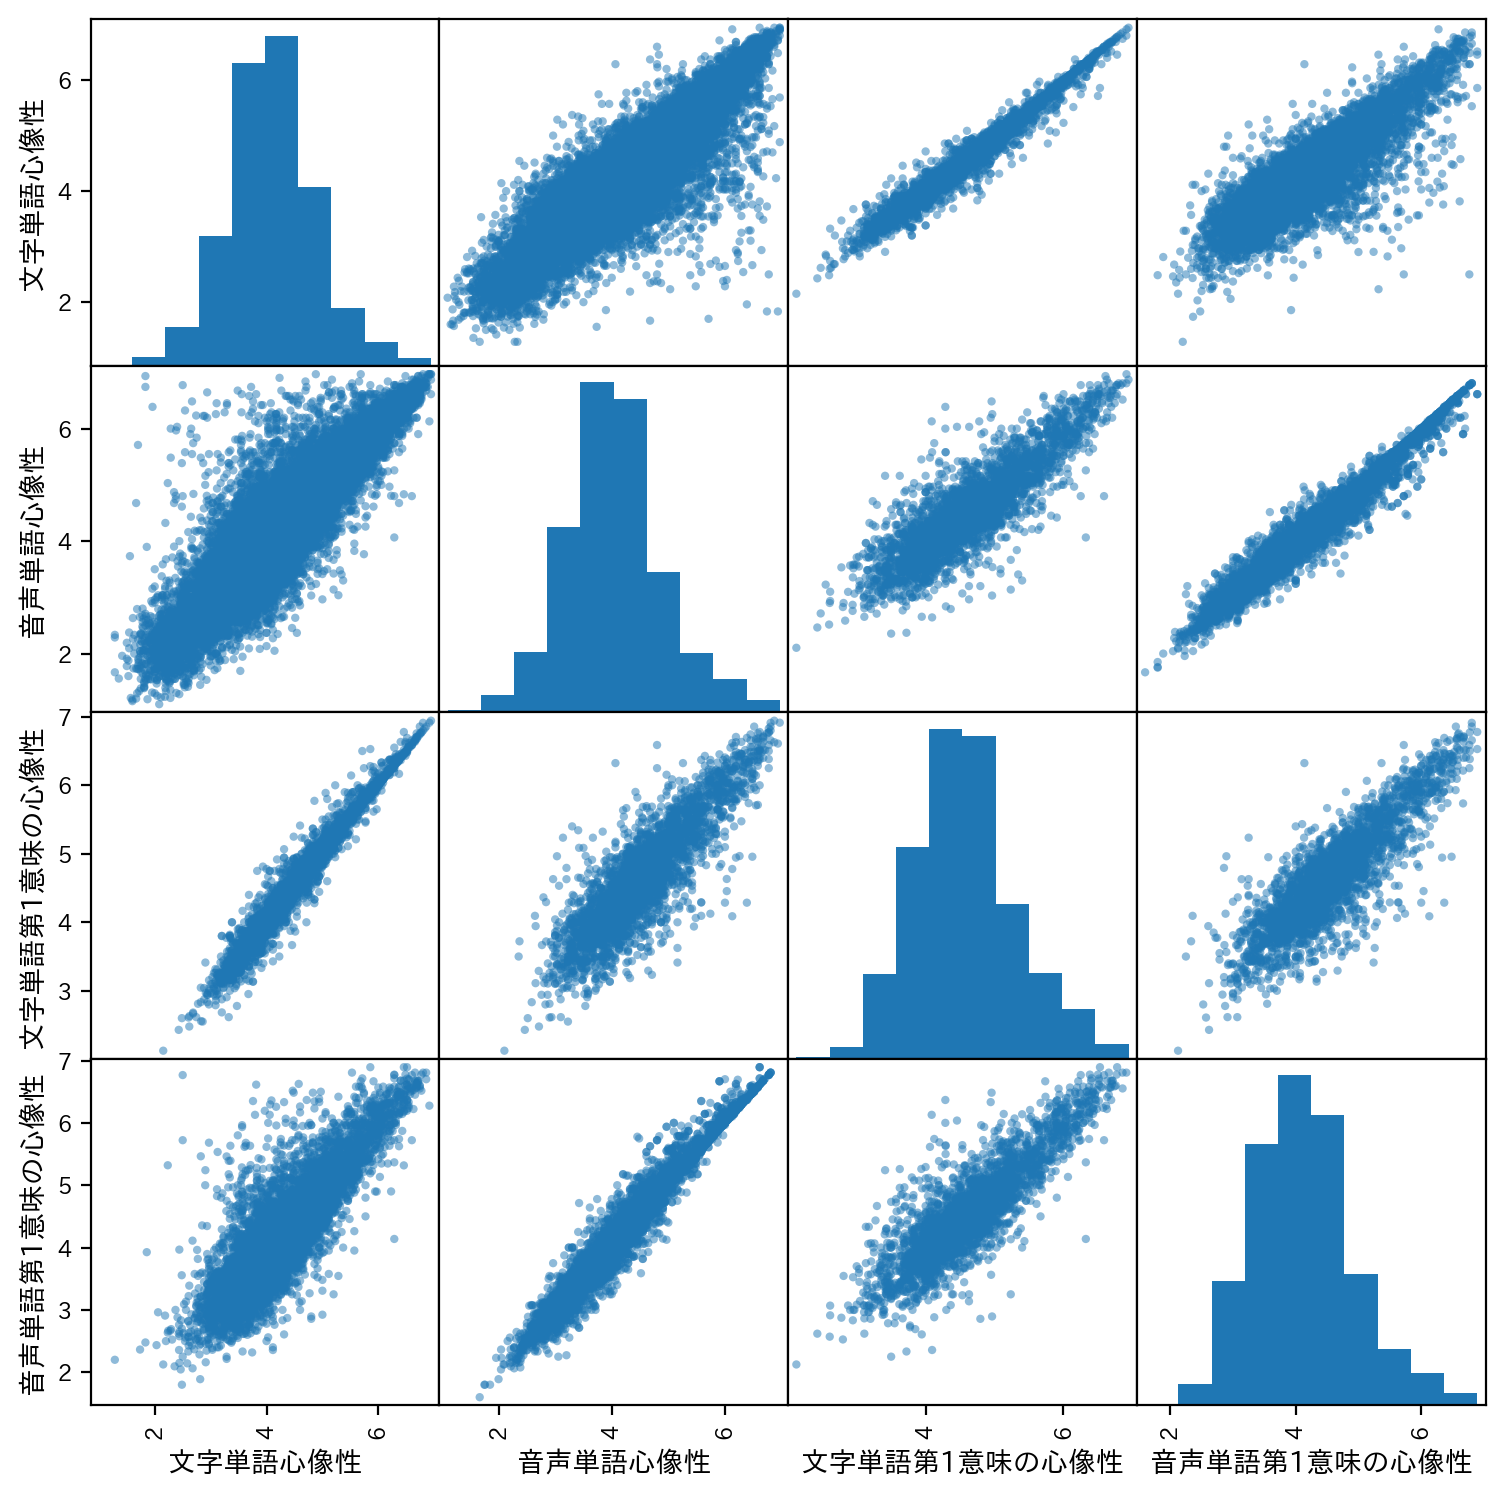

In [ ]:
pd.plotting.scatter_matrix(psylex8, figsize=(9,9))

In [ ]:
psylex8.corr()

,文字単語心像性,音声単語心像性,文字単語第1意味の心像性,音声単語第1意味の心像性
文字単語心像性,1.000000,0.883567,0.981000,0.850188
音声単語心像性,0.883567,1.000000,0.864805,0.981132
文字単語第1意味の心像性,0.981000,0.864805,1.000000,0.862888
音声単語第1意味の心像性,0.850188,0.981132,0.862888,1.000000


In [ ]:
psylex8.describe()

,文字単語心像性,音声単語心像性,文字単語第1意味の心像性,音声単語第1意味の心像性
count,52830.000000,44052.000000,4458.000000,11110.000000
mean,4.097556,4.047731,4.576556,4.122492
std,0.786036,0.863011,0.749139,0.809536
min,1.000000,1.100000,2.125000,1.600000
25%,3.600000,3.484000,4.063000,3.548000
50%,4.086000,4.032000,4.530000,4.074000
75%,4.543000,4.516000,5.000000,4.600000
max,6.943000,6.968000,6.943000,6.893000


In [ ]:
if isColab:
    from google.colab import files
    uploaded = files.upload()  # psylex8.txt をアップロード    

In [ ]:
fname = 'psylex71.txt'  
with open(fname, 'r', encoding='utf-8') as fp:
    A = fp.readlines()

psylex71_dict = {}
for line in A:
    #_line = unicodedata.normalize('NFKC', line).strip().split(' ')
    _line = line.strip().split(' ')
    _line[0] = _line[0].replace('\ufeff','')
    
    for x in [5,6,7,8,9,10]:
    #for x in [7,8,9,10,11,12,13,14,15,16,17,18,19]:
        if _line[x] == 'z':
            _line[x] = np.nan
        else:
            _line[x] = int(_line[x])
    
        psylex71_dict[_line[0]] = {
            '独自ID番号':       _line[0],
            '共通ID番号':       _line[1],
            '表記':            _line[2],
            '読み':           _line[3],
            '品詞記号':       _line[4],
            '頻度（全体）':    _line[5],
            '頻度01':    _line[6],
            '頻度02':    _line[7],
            '頻度03':    _line[8],
            '頻度04':    _line[9],
            '頻度05':    _line[10],
            # '頻度06':    _line[13],
            # '頻度07':    _line[14],
            # '頻度08':    _line[15],
            # '頻度09':    _line[16],
            # '頻度10':    _line[17],
            # '頻度11':    _line[18],
            # '頻度12':    _line[19],
        }
        

psylex71 = pd.DataFrame.from_dict(psylex71_dict, orient='index')    
psylex71

,独自ID番号,共通ID番号,表記,読み,品詞記号,頻度（全体）,頻度01,頻度02,頻度03,頻度04,頻度05
000001,000001,z,,,記,332311,14022,15429,17146,21312,25136
000002,000002,z,、,、,記,15266632,882868,874817,937982,1158101,1217775
000003,000003,z,。,。,記,10370238,510725,522786,559585,713590,765180
000004,000004,z,，,，,記,7086,568,593,575,1236,1369
000005,000005,z,．,．,記,133586,15526,15500,16469,17484,17834
...,...,...,...,...,...,...,...,...,...,...,...
341767,341767,z,槇島,マギシマ,固名,16,0,0,0,0,0
341768,341768,z,槇島町,マキジマチョウ,固名,4,0,0,0,0,0
341769,341769,z,槇本,マキモト,固名,1,0,0,0,0,0
341770,341770,z,槇野,マキノ,固名,6,0,0,0,0,0


In [ ]:
for x in list(psylex71_dict.keys())[:3]:
    print(x, psylex71_dict[x])

array([[<AxesSubplot:xlabel='頻度（全体）', ylabel='頻度（全体）'>,
        <AxesSubplot:xlabel='頻度01', ylabel='頻度（全体）'>,
        <AxesSubplot:xlabel='頻度02', ylabel='頻度（全体）'>,
        <AxesSubplot:xlabel='頻度03', ylabel='頻度（全体）'>,
        <AxesSubplot:xlabel='頻度04', ylabel='頻度（全体）'>,
        <AxesSubplot:xlabel='頻度05', ylabel='頻度（全体）'>],
       [<AxesSubplot:xlabel='頻度（全体）', ylabel='頻度01'>,
        <AxesSubplot:xlabel='頻度01', ylabel='頻度01'>,
        <AxesSubplot:xlabel='頻度02', ylabel='頻度01'>,
        <AxesSubplot:xlabel='頻度03', ylabel='頻度01'>,
        <AxesSubplot:xlabel='頻度04', ylabel='頻度01'>,
        <AxesSubplot:xlabel='頻度05', ylabel='頻度01'>],
       [<AxesSubplot:xlabel='頻度（全体）', ylabel='頻度02'>,
        <AxesSubplot:xlabel='頻度01', ylabel='頻度02'>,
        <AxesSubplot:xlabel='頻度02', ylabel='頻度02'>,
        <AxesSubplot:xlabel='頻度03', ylabel='頻度02'>,
        <AxesSubplot:xlabel='頻度04', ylabel='頻度02'>,
        <AxesSubplot:xlabel='頻度05', ylabel='頻度02'>],
       [<AxesSubplot:xlabel='頻度（全体）', ylabe

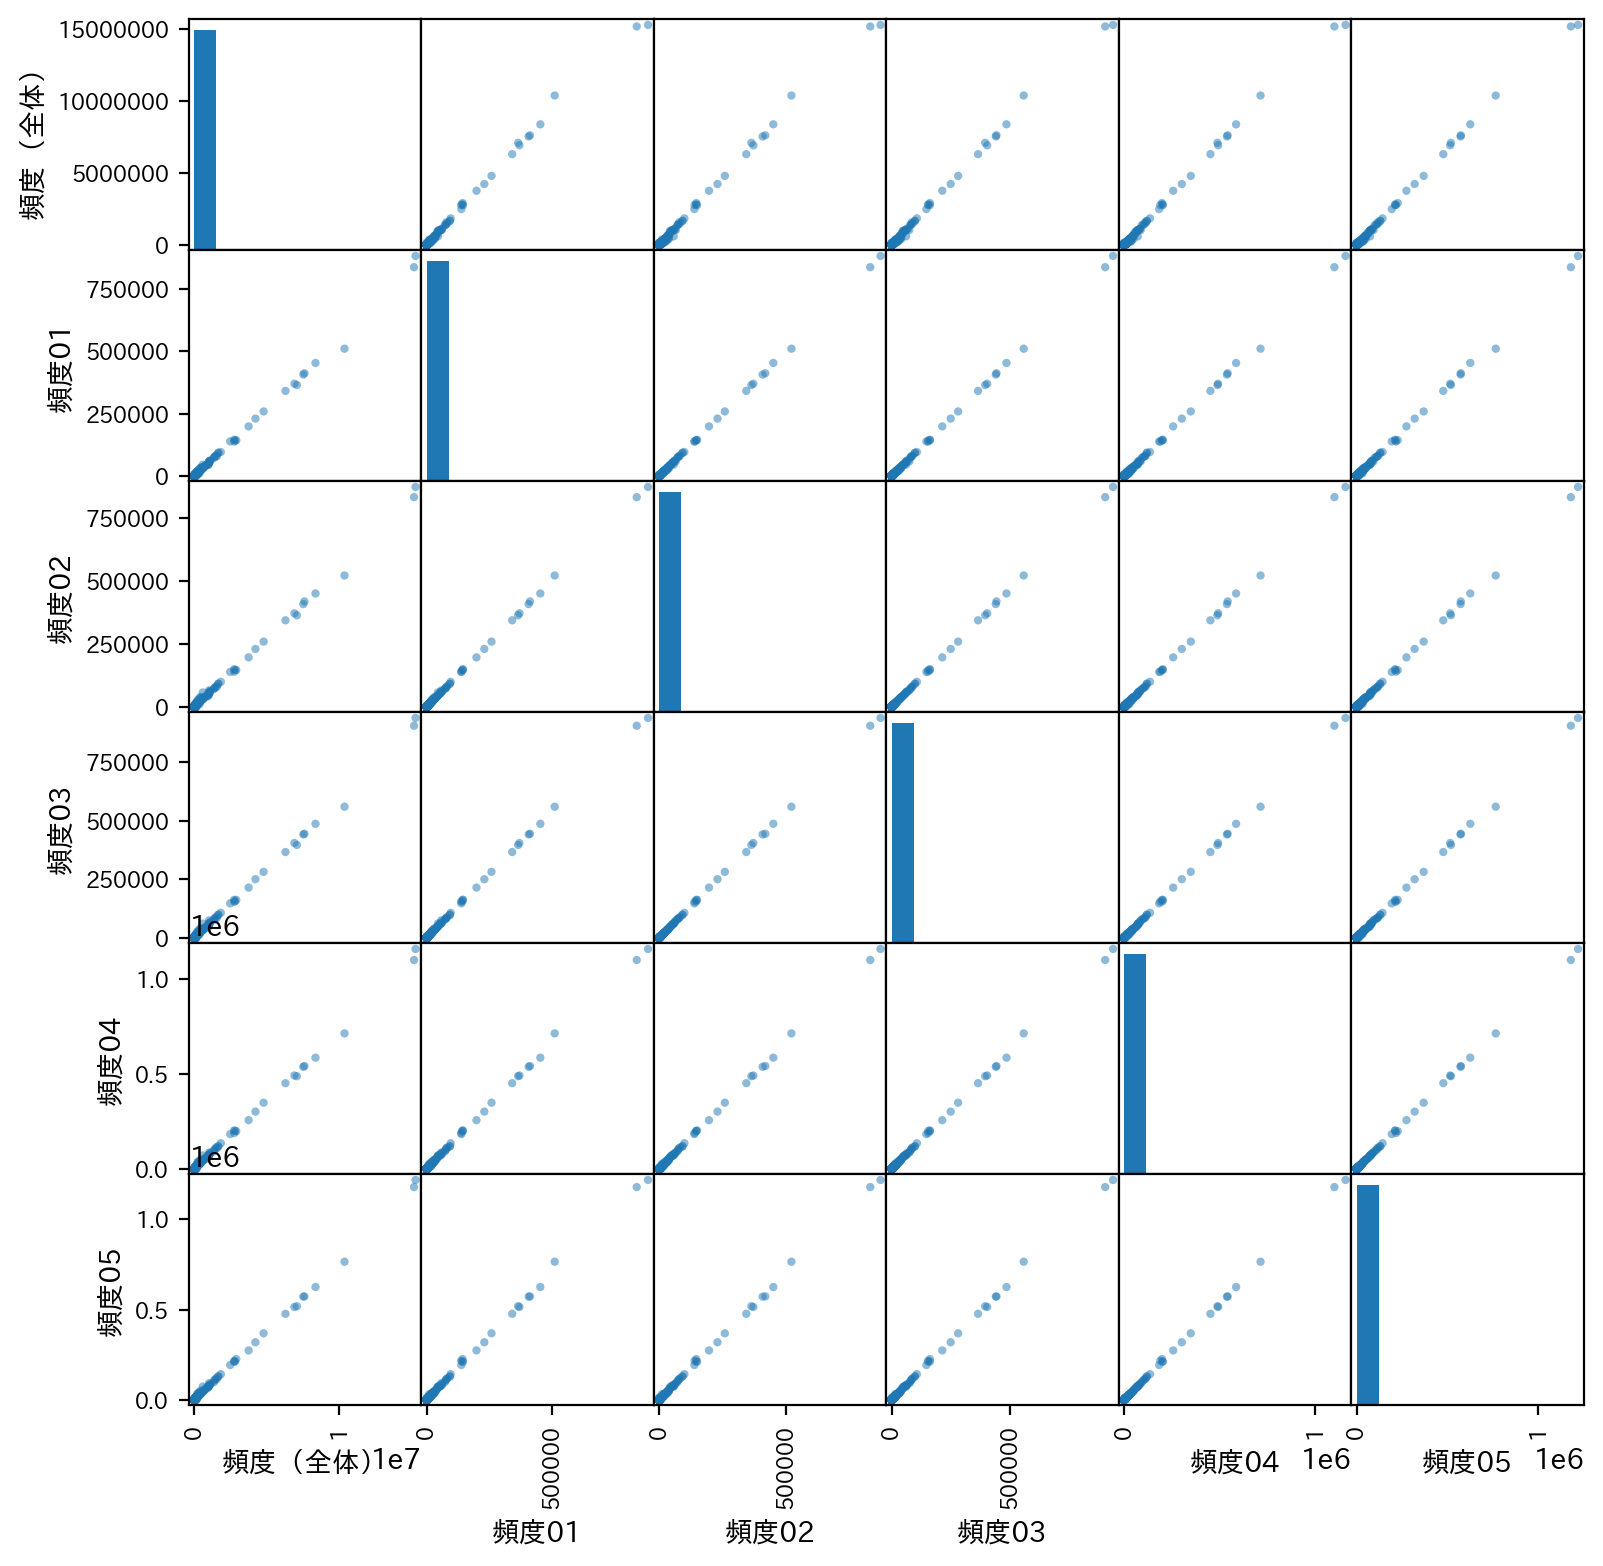

In [ ]:
pd.plotting.scatter_matrix(psylex71, figsize=(9,9))

In [ ]:
psylex71.corr()

,頻度（全体）,頻度01,頻度02,頻度03,頻度04,頻度05
頻度（全体）,1.000000,0.998521,0.998604,0.998696,0.999007,0.999188
頻度01,0.998521,1.000000,0.999748,0.999718,0.999484,0.999296
頻度02,0.998604,0.999748,1.000000,0.999894,0.999699,0.999542
頻度03,0.998696,0.999718,0.999894,1.000000,0.999731,0.999610
頻度04,0.999007,0.999484,0.999699,0.999731,1.000000,0.999833
頻度05,0.999188,0.999296,0.999542,0.999610,0.999833,1.000000


In [ ]:
ntt_psylex71_dict = psylex71.to_dict(orient='index')

In [ ]:
list(ntt_psylex71_dict.keys())[:3]

['000001', '000002', '000003']

In [ ]:
ntt_psylex71_dict['000001']

{'独自ID番号': '000001',
 '共通ID番号': 'z',
 '表記': '\u3000',
 '読み': '\u3000',
 '品詞記号': '記',
 '頻度（全体）': 332311,
 '頻度01': 14022,
 '頻度02': 15429,
 '頻度03': 17146,
 '頻度04': 21312,
 '頻度05': 25136}

In [ ]:
import torch
torch.save({'dataframe':psylex71}, 'psylex71dataframe.pt')
torch.save({'dataframe':psylex1}, 'psylex1dataframe.pt')
torch.save({'dataframe':psylex8}, 'pyslex8dataframe.pt')

In [ ]:
!gls -lht *.pt

-rw-r--r-- 1 _asakawa staff  14M Oct 25 19:18 pyslex8dataframe.pt
-rw-r--r-- 1 _asakawa staff 6.5M Oct 25 19:18 psylex1dataframe.pt
-rw-r--r-- 1 _asakawa staff  46M Oct 25 19:18 psylex71dataframe.pt


In [ ]:
psylex1

,読み,表記,モーラ数,アクセント型,文字音声親密度,音声単語親密度,文字単語親密度
000010,ア,あ,1,1,5.031,5.156,5.562
000020,アア,ああ,2,1,5.844,5.531,5.750
000030,アア,ああ,2,1,5.844,5.531,5.750
000040,アア,ああ,2,2,4.875,4.219,5.750
000050,アークトウ,アーク灯,5,5,2.594,2.312,2.688
...,...,...,...,...,...,...,...
796250,ワルガル,悪がる,4,3,4.812,3.906,4.812
796260,ワルガシコサ,悪賢さ,6,5,4.312,4.844,3.969
796290,ワンリョクザタ,腕力沙汰,6,6,3.000,3.500,3.344
850830,ナリキンフウ,成金風,6,6,3.938,4.281,3.562


In [ ]:
x = torch.load('psylex1dataframe.pt')['dataframe']
x

,読み,表記,モーラ数,アクセント型,文字音声親密度,音声単語親密度,文字単語親密度
000010,ア,あ,1,1,5.031,5.156,5.562
000020,アア,ああ,2,1,5.844,5.531,5.750
000030,アア,ああ,2,1,5.844,5.531,5.750
000040,アア,ああ,2,2,4.875,4.219,5.750
000050,アークトウ,アーク灯,5,5,2.594,2.312,2.688
...,...,...,...,...,...,...,...
796250,ワルガル,悪がる,4,3,4.812,3.906,4.812
796260,ワルガシコサ,悪賢さ,6,5,4.312,4.844,3.969
796290,ワンリョクザタ,腕力沙汰,6,6,3.000,3.500,3.344
850830,ナリキンフウ,成金風,6,6,3.938,4.281,3.562
